##### Часть 1. Изучение общей информации и подготовка данных:
* [1. Подключение необходимых библиотек и импортирование функций.](#6.1-bullet)
* [2. Загрузка и изучение файла с данными.](#6.2-bullet)
* [3. Подготовка данных.](#6.3-bullet)

##### Часть 2. Исследование задачи:
* [4. Обучение моели без учёта дисбаланса.](#6.4-bullet)
* [5. Исследование баланса классов.](#6.5-bullet)
* [6. Вывод.](#6.6-bullet)

##### Часть 3. Улучшение качества модели:
* [7. Улучшение качества модели с учётом дисбаланса классов, поиск наилучше модели.](#6.7-bullet)
* [8. Проверка F1-меры на тестовой выборке.](#6.8-bullet)
* [9. Измерение AUC-ROC, сравнение её значение с F1-мерой.](#6.9-bullet)

##### Часть 4. Обший вывод:
* [10. Обший вывод.](#6.10-bullet)


## Часть 1. Изучение общей информации. 

<a id='6.1-bullet'></a> 
### 1. Подключение необходимых библиотек и импортирование функций. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RANDOM_STATE = 12345
SINGLE_TEXT_INDENT = '  '

pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = None

GV = {'Text_Indent': ''}

<a id='6.2-bullet'></a> 
### 2. Загрузка и изучение файла с данными.

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('../datasets/Churn.csv')

Получим первые 10 строк таблицы.

In [3]:
display(data.head(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Выведем общую информацию о данных в таблице *data*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Всего в таблице 14 столбцов с разным типами данных *int64*, *object* и *float64*.

Информация, содержащаяся в столбцах:

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

<a id='6.3-bullet'></a> 
### 3. Подготовка данных.

В столбце *Tenure* есть пропуски. Посмотрим на первые десять строк с такими пропусками.

In [5]:
data[data.Tenure.isna()].head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Ничего особенного в этих строках не видно. Предположим что эти клиенты первый год являются клиентами, но некторые уже покинули банк. Быстро. Чтобы прикинуть возможны ли такие быстрые уходы и укладывается ли это в общую тенденцию, посмотрим какой процент ушедших с пропуском в *Tenure* и какой процент ушедших с нулём в с 0 *Tenure*: 

In [6]:
print(f'Ушедших с пропуском в графе Tenure {data[data.Tenure.isna()].Exited.sum() / data[data.Tenure.isna()].Exited.count():.2%}') 
print(f'Ушедших с нулём в графе Tenure {data[data.Tenure == 0].Exited.sum() / data[data.Tenure == 0].Exited.count():.2%}') 

Ушедших с пропуском в графе Tenure 20.13%
Ушедших с нулём в графе Tenure 23.56%


Процент примерно одинаков, значит это реально могут быть клиенты первый год в банке. Заменим в этом столбце пропуски на нули.

In [7]:
data.Tenure = data.Tenure.fillna(0)

print('Количество пропусков в столбце Tenure -', data.Tenure.isna().sum())

Количество пропусков в столбце Tenure - 0


Некоторые колонки не имеют смысла для обучения. Это *RowNumber*, *CustomerId*, *Surname*. Выкинем их как ненужные в нашей задаче.

In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print(data.dtypes)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Осталось 11 столбцов со смысловой нагрузкой в плане обучения модели.

Исключим признаки, которые явно коррелируются с каким либо другим, для этого построим матрицу корреляции.

In [9]:
def get_figsize():
    return (16, 9)

def plot_show(xlabel, ylabel, title):
    plt.gca().set(xlabel=xlabel, ylabel=ylabel)
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

def build_heatmap(df, cmap=None, xlabel='', ylabel='', title=''):
    fig = plt.figure(figsize=get_figsize(), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()
    sns.heatmap(df, cmap=cmap, annot=True)
    plot_show(xlabel, ylabel, title)

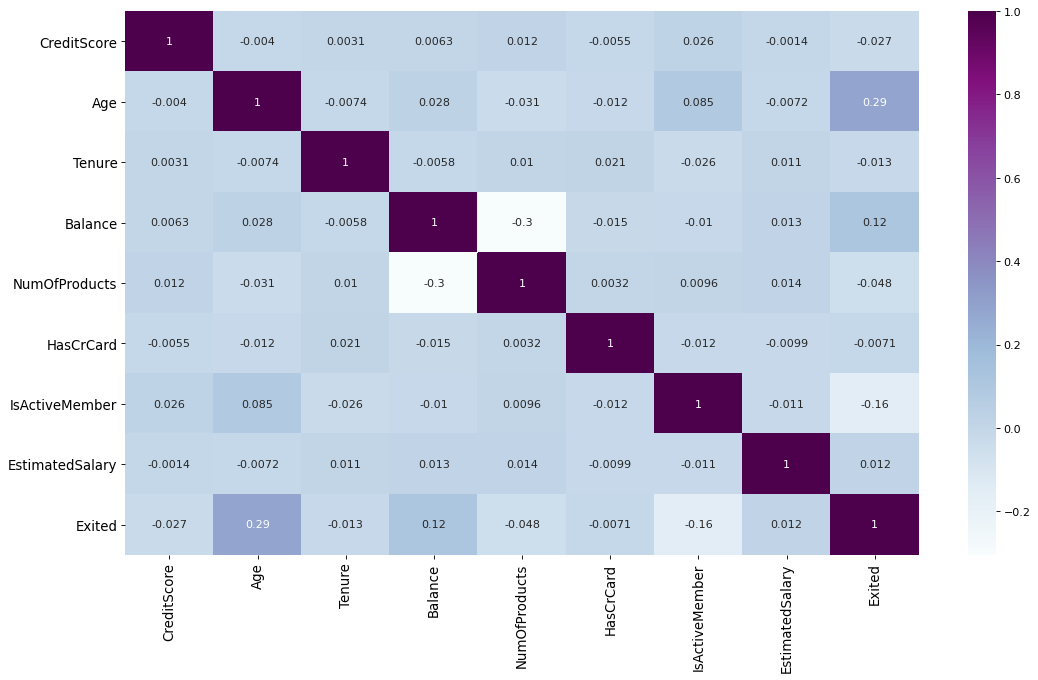

In [10]:
build_heatmap(data.corr(), cmap='BuPu')

Есть небольшая обратная коррелляция между количеством продуктов и балансом на счёте, но не такая сильная чтобы исключать какой либо из признаков. Других сильно кореллируемых признаков не обнаружено, по этому оставим все столбцы для модели. Но тут мы уже можем сказать что относительно серьёзно на уход влияет возраст (прямая зависимость) и активность (обратная зависимость). Удивляет что прослеживается хоть и не большая, но прямая зависимость размера баланса на счёте и уходом клиента.

Преобразуем категориальные признаки в численные с помощью техники прямого кодирования с исключением последнего столбца.

In [11]:
def category_to_numeric(df, metod='OHE'):
    print(GV['Text_Indent'] + 'Перевод категориальных признаков в численные методом', metod)
    if metod == 'OHE':
        return pd.get_dummies(df, drop_first=True)
    else:
        encoder = OrdinalEncoder()
        return pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

In [12]:
data_ohe = category_to_numeric(data, 'OHE')

display(data_ohe.head())

Перевод категориальных признаков в численные методом OHE


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разделим данные на обучающую, валидационную и тестовую выборки и выделим в них целевой признак. 

In [13]:
def split_data(df, test_size, target_feature='Exited', allocate_target_in_train=False, show_comments=True):
    
    def allocate_target_feature(df, sample):
        target = df[target_feature]
        features = df.drop([target_feature], axis=1)
        if show_comments:
            print(f'Размер {sample} выборки признаков: {features.shape}, целевого признака: {target.shape}')
        return target, features

    train_features, test_features = train_test_split(df, test_size=test_size, random_state=RANDOM_STATE)
    test_target, test_features = allocate_target_feature(test_features, 'тестовой')
    if allocate_target_in_train:
        train_target, train_features = allocate_target_feature(train_features, 'тренировочной')
        return train_features, train_target, test_features, test_target
    return train_features, test_features, test_target

Спрятанной тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов сделаем равными. Исходные данные разобьём в соотношении 3:1:1

Если мы разбиваем в таком соотношении, то для начала с помощью функции split_data отделим тестовую выборку, которая от исходной получится 20% с отделением целевого признака для тестовой выборки.

In [14]:
data_train, test_features, test_target = split_data(data_ohe, test_size=0.2)

Размер тестовой выборки признаков: (2000, 11), целевого признака: (2000,)


Теперь от выборки data_train с помощью функции split_data отделим 25% валидационной выборки.

In [15]:
train_features, train_target, valid_features, valid_target = split_data(data_train, test_size=0.25, 
                                                                        allocate_target_in_train=True)

Размер тестовой выборки признаков: (2000, 11), целевого признака: (2000,)
Размер тренировочной выборки признаков: (6000, 11), целевого признака: (6000,)


In [16]:
del data_train

Получили следующие наборы данных:
* train_features - набор тренировочных признаков
* train_target - набор тренировочных целевых признаков
* valid_features - набор валидационных признаков
* valid_target - набор валидационных целевых признаков
* test_features - набор тестовых признаков
* test_target - набор тестовых целевых признаков

В данных есть 5 численных признака: *CreditScore, Age, Balance, NumOfProducts, EstimatedSalary*, чтобы модель воспринимала их одинаково важными, масштабируем эти признаки методом стандартизации данных.
Сохраним получившийся датафрейм в *prepared_data*

Напишем функцию стандартизации

In [17]:
def standardize(*array, columns):
    print(GV['Text_Indent'] + 'Стандантизирование столбцов', columns)
    result = array
    scaler = StandardScaler()
    scaler.fit(result[0][columns])
    for i in range(len(array)):
        result[i][columns] = scaler.transform(result[i][columns])
    return result

In [18]:
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
train_features, valid_features, test_features = standardize(train_features, valid_features, test_features, columns=numeric)

display("Тренировочная выборка:", train_features.head(), "Валидационная выборка:", 
        valid_features.head(), "Тестовая выборка:", test_features.head())

Стандантизирование столбцов ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']


'Тренировочная выборка:'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.174142,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-1.451074,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.131841,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-0.812608,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.783558,0.813110,0.816929,1,1,0.801922,0,0,0


'Валидационная выборка:'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2358,0.175393,0.399118,-1.131841,1.385698,-0.896909,0,1,-1.466761,0,0,1
8463,-1.299609,0.971741,-0.812608,-1.232442,-0.896909,1,0,0.254415,0,1,1
163,0.711757,-0.268942,-0.812608,-1.232442,0.816929,1,1,0.122863,0,1,0
3074,-0.391916,0.494555,0.464325,0.672529,-0.896909,1,0,0.585847,1,0,0
5989,0.165078,1.353490,1.741257,0.536522,-0.896909,0,0,1.462457,0,0,0


'Тестовая выборка:'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.123733,0.685430,-0.493375,-1.232442,-0.896909,1,1,0.980212,0,1,0
1402,1.083087,-0.937002,1.102791,0.858518,-0.896909,1,0,-0.390486,0,0,1
8606,1.598822,0.303681,0.145091,-1.232442,0.816929,1,1,-0.435169,0,1,1
8885,0.165078,0.589993,-0.174142,0.412100,0.816929,1,1,1.017079,0,1,1
6494,0.484834,-1.032439,0.783558,-1.232442,0.816929,1,1,-1.343558,0,0,1


В результате подготовки данных мы удалили лишние столбцы, убрали пропуски в столбце *Tenure*, перевели категориальные признаки в численные, разбили данные на тренировочные, валидационные и тестовые, выделили целевой признак и стандартизирвали признаки, чтобы дать им одинаковый вес перед обучаемой моделью.

## Часть 2. Исследование задачи. 

<a id='6.4-bullet'></a> 
### 4. Обучение моели без учёта дисбаланса. 

Посчитаем F1-меру для подготовленных данных на моделях **дерево решений**, **случайный лес** и **логическая регрессия**.

In [19]:
def get_class_weight(parametrs):
    if 'class_weight' in parametrs:
        return parametrs['class_weight']
    else:
        return None

def f1_for_DecisionTree(train_f, train_t, test_f, test_t, max_depth, class_weight):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=max_depth, class_weight=class_weight)
    model.fit(train_f, train_t)
    predicted = model.predict(test_f)
    return f1_score(test_t, predicted)

def f1_for_RandomForest(train_f, train_t, test_f, test_t, max_depth, est, class_weight):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=max_depth, class_weight=class_weight)
    model.fit(train_f, train_t)
    predicted = model.predict(test_f)
    return f1_score(test_t, predicted)

def f1_for_LogisticRegression(train_f, train_t, test_f, test_t, class_weight):
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight=class_weight)
    model.fit(train_f, train_t)
    predicted = model.predict(test_f)
    return f1_score(test_t, predicted)

def best_DecisionTree(train_f, train_t, valid_f, valid_t, parametrs, show_progress=True):
    best_f1, best_depth, progress = 0, 0, 0
    progress_step = 100 / len(parametrs['max_depth'])
    for depth in parametrs['max_depth']:
        f1 = f1_for_DecisionTree(train_f, train_t, valid_f, valid_t, depth, get_class_weight(parametrs))
        progress += progress_step
        if show_progress:
            print(GV['Text_Indent'] + 'Дерево решений. Прогресс обучения: {:.1f}% {}'
                  .format(progress, '.' * int(progress / 2)), end='\r')
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
                
    print ('')
    return {'Model': 'DecisionTree', 'best_f1': best_f1, 'best_depth': best_depth}

def best_RandomForest(train_f, train_t, valid_f, valid_t, parametrs, show_progress=True):
    best_f1, best_est, best_depth, progress = 0, 0, 0, 0
    progress_step = 100 / (len(parametrs['n_estimators']) * len(parametrs['max_depth']))
    for est in parametrs['n_estimators']:
        for depth in parametrs['max_depth']:
            f1 = f1_for_RandomForest(train_f, train_t, valid_f, valid_t, depth, est, get_class_weight(parametrs))
            progress += progress_step
            if show_progress:
                print(GV['Text_Indent'] + 'Случайный лес. Прогресс обучения: {:.1f}% {}'
                      .format(progress, '.' * int(progress / 2)), end='\r')
            if f1 > best_f1:
                best_f1 = f1
                best_depth = depth
                best_est = est
    print ('')
    return {'Model': 'RandomForest', 'best_f1': best_f1, 'best_depth': best_depth, 'best_est': best_est}

def best_LogisticRegression(train_f, train_t, valid_f, valid_t, parametrs):
    return {'Model': 'LogisticRegression', 
            'best_f1': f1_for_LogisticRegression(train_f, train_t, valid_f, valid_t, get_class_weight(parametrs))}

def best_models(train_f, train_t, valid_f, valid_t, parametrs, show_progress=True):
    result = pd.DataFrame(columns=('Model', 'best_f1'))
    result = result.append(
        best_DecisionTree(train_f, train_t, valid_f, valid_t, parametrs), ignore_index=True)
    result = result.append(
        best_RandomForest(train_f, train_t, valid_f, valid_t, parametrs), ignore_index=True)
    result = result.append(
        best_LogisticRegression(train_f, train_t, valid_f, valid_t, parametrs), ignore_index=True)
    return result  

def format_display(models_params):
    display(
        models_params
        .style.bar(subset=['best_f1'], align='mid', color=['#d65f5f', '#5fba7d'])
        .format({'best_f1': '{:.3f}'})
        .format({'best_depth': '{:.3f}', 'best_est': '{:.3f}'})
    )

In [20]:
parametrs = { 
    'n_estimators': range(10, 51, 10),
    'max_depth': range(2, 21)
}

print('Процесс обучения моделей:')
best_models_params = best_models(train_features, train_target, valid_features, valid_target, parametrs)

Процесс обучения моделей:
Дерево решений. Прогресс обучения: 100.0% ..................................................
Случайный лес. Прогресс обучения: 100.0% ..................................................


In [21]:
print('Результат обучения моделей:')
format_display(best_models_params)

Результат обучения моделей:


,Model,best_f1,best_depth,best_est
0,DecisionTree,0.549,7.000,nan
1,RandomForest,0.577,17.000,50.000
2,LogisticRegression,0.306,nan,nan


Посмотрим результаты этих моделей на тестовой выборке

In [22]:
def f1_by_best_params(models_params, train_f, train_t, test_f, test_t):
    result = pd.DataFrame(columns=('Model', 'f1'))

    params = models_params[models_params.Model == 'DecisionTree'].reset_index()
    result = result.append(
        {'Model': 'DecisionTree', 
         'f1': f1_for_DecisionTree(train_f, train_t, test_f, test_t, int(params.loc[0, 'best_depth']), None)}, 
        ignore_index=True)

    params = models_params[models_params.Model == 'RandomForest'].reset_index()
    result = result.append(
        {'Model': 'RandomForest',
         'f1': f1_for_RandomForest(train_f, train_t, test_f, test_t, int(params.loc[0, 'best_depth']), int(params.loc[0, 'best_est']), None)},
        ignore_index=True)
    
    params = models_params[models_params.Model == 'LogisticRegression'].reset_index()
    result = result.append(
        {'Model': 'LogisticRegression',
         'f1': f1_for_LogisticRegression(train_f, train_t, test_f, test_t, None)},
        ignore_index=True)

    return result

In [23]:
print('Результат предсказания обученных моделей на тестовой выборке:')
(
f1_by_best_params(best_models_params, train_features, train_target, test_features, test_target)
    .style
    .bar(align='mid', color=['#d65f5f', '#5fba7d'])
    .format({'f1': '{:.3f}'})
)

Результат предсказания обученных моделей на тестовой выборке:


,Model,f1
0,DecisionTree,0.564
1,RandomForest,0.570
2,LogisticRegression,0.295


Результаты не плохие, но их можно улучшить, если сбалансировать целевой признак.

<a id='6.5-bullet'></a> 
### 5. Исследование баланса классов. 

Посмотрим на сколько разбалансирован целефой признак.

In [24]:
print('Количество нулей:', train_target[train_target == 0].count())
print('Количество единиц:', train_target[train_target == 1].count())
print('Отношение нулей к единицам:', train_target[train_target == 0].count() / train_target[train_target == 1].count())

Количество нулей: 4781
Количество единиц: 1219
Отношение нулей к единицам: 3.922067268252666


Нулей в тренеровочных данных почти в 4 раза больше чем единиц. Это сильная разбалансировка, за счёт которой можно улучшить качество обучения моделей.

<a id='6.6-bullet'></a> 
### 6. Вывод. 

Результат обучения моделей без учёта дизбаланса дал неплохой результат на тестовой выборке у моделей *случайный лес* - **0.57** и *дерево решений* - **0.564**, на *логической регрессии* результат оказался хуже - **0.295**. Но, присуствует сильная разбалансировка по целевому признаку. Если его учесть, то возможно результаты получатся лучше.

## Часть 3. Исследование задачи. 

<a id='6.7-bullet'></a> 
### 7. Улучшение качества модели с учётом дисбаланса классов, поиск наилучшей модели. 

Для улучшения качества модели можно сбалансировать целевой признак.

Для блансировки используем последовательно 3 техники: **взвешивание классов, upsampling и downsampling**

Напишим функцию балансировки в которую будем передовать технику:

In [25]:
balanced_tehniques = ('None', 'Upsampling', 'Downsampling')

def balance(features, target, technique, factor):
    print(GV['Text_Indent'] + 'Балансировка техникой', technique, 'c коэффициентом', factor)
    features_zeros, features_ones = features[target == 0], features[target == 1]
    target_zeros, target_ones = target[target == 0], target[target == 1]
    if technique == 'Upsampling':
        new_features = pd.concat([features_zeros] + [features_ones] * factor)
        new_target = pd.concat([target_zeros] + [target_ones] * factor)
    elif technique == 'Downsampling':
        new_features = pd.concat([features_zeros.sample(frac=1/factor, random_state=RANDOM_STATE)] + [features_ones])
        new_target = pd.concat([target_zeros.sample(frac=1/factor, random_state=RANDOM_STATE)] + [target_ones])
    else:
        return features, target
    
    return shuffle(new_features, new_target, random_state=RANDOM_STATE)    

Кроме всего прочего, проверим модели на 2 видах преобразования категориальные признаки в численные: с помощью техники **прямого кодирования с исключением последнего столбца** и **порядкового кодирования**. Для этого у нас есть уже функция *category_to_numeric*. Создадим список видов преобразования.

In [26]:
category_to_numeric_metods = ('OHE', 'Ordinal encoding')

Сделаем поиск наилучшей модели. Для этого:
* переведём категориальные данные в числовые оним из методов (**'OHE', 'Ordinal encoding'**) для этого воспользуемся функцией *category_to_numeric*
* разобьём выборку на тестовую, валидационную и тренировочную (отдилять тестовую выборку можно только после первого пункта и придётся это делать 2 раза, но тестовая выборка от этого не изменится, так как всё время будет использоваться константный *random_state*) для этого воспользуемся функцией *split_data*
* стандартизируем данные с помощью функции *standardize*
* сбалансируем данные с помощью функции *balance* одним из 2 способов с различными коэффициентами (2, 4)
* обучим 3 модели с помощью функции *best_models* с гиперпараметром *class_weight* и без него
* соберём получившиеся результаты в таблицу

In [27]:
del test_features, test_target, train_features, train_target, valid_features, valid_target, data_ohe, best_models_params

In [28]:
def find_best_models():
    balance_factors = (2, 4)
    best_models_params = pd.DataFrame()
    adv_models_params = pd.DataFrame(columns=('Category_to_numeric_metod', 'Balanced_tehnique', 'IsWaiting'))
   
    print('Процесс обучения моделей:')
    for category_to_numeric_metod in category_to_numeric_metods:
        GV['Text_Indent'] = SINGLE_TEXT_INDENT;
        data_train, test_features, test_target = split_data(category_to_numeric(data, category_to_numeric_metod), 
                                                            test_size=0.2, show_comments=False)
        train_features, train_target, valid_features, valid_target = split_data(
            data_train, test_size=0.25, allocate_target_in_train=True, show_comments=False)
        
        GV['Text_Indent'] = SINGLE_TEXT_INDENT * 2;
        train_features, valid_features = standardize(train_features, valid_features, columns=numeric)
    
        for balanced_tehnique in balanced_tehniques:
            if balanced_tehnique != 'None':
                balance_factors_range = range(len(balance_factors))
            else:
                balance_factors_range = range(1)
            
            for balanced_factor_index in balance_factors_range:
                # балансировка
                GV['Text_Indent'] = SINGLE_TEXT_INDENT * 3;
                if balanced_tehnique != 'None':
                    balance_factor = balance_factors[balanced_factor_index];
                    balanced_features, balanced_target = balance(train_features, train_target, balanced_tehnique,
                                                                 balance_factor)
                else:
                    balance_factor = np.nan;
                    print(GV['Text_Indent'] + 'Без балансировки')
                    balanced_features, balanced_target = train_features, train_target
                    
                for IsWaiting in range(2):
                    GV['Text_Indent'] = SINGLE_TEXT_INDENT * 4;
                    if IsWaiting == 1:
                        print(GV['Text_Indent'] + 'С балансировкой классов методом взвешивания')
                    else:
                        print(GV['Text_Indent'] + 'Без балансировки классов методом взвешивания')
                    
                    for i in range(3):
                        adv_models_params = adv_models_params.append({'Category_to_numeric_metod': category_to_numeric_metod, 
                                                                      'Balanced_tehnique': balanced_tehnique,
                                                                      'Balanced_factor': balance_factor,
                                                                      'IsWaiting': bool(IsWaiting)}, ignore_index=True)
                    parametrs = { 
                        'n_estimators': range(10, 61, 10),
                        'max_depth': range(5, 21)
                    }
                    if IsWaiting == 1:
                        parametrs['class_weight'] = 'balanced'
                    else:
                        parametrs['class_weight'] = None
            
                    GV['Text_Indent'] = SINGLE_TEXT_INDENT * 5;
                    best_models_params = best_models_params.append(best_models(
                        balanced_features, balanced_target, valid_features, valid_target, parametrs), ignore_index=True)
    
    return pd.concat([adv_models_params, best_models_params], axis=1)

In [29]:
GV['Text_Indent'] = ''
print('Результат обучения моделей:')
best_models_params = find_best_models()
GV['Text_Indent'] = ''

Результат обучения моделей:
Процесс обучения моделей:
  Перевод категориальных признаков в численные методом OHE
    Стандантизирование столбцов ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
      Без балансировки
        Без балансировки классов методом взвешивания
          Дерево решений. Прогресс обучения: 100.0% ..................................................
          Случайный лес. Прогресс обучения: 100.0% ..................................................
        С балансировкой классов методом взвешивания
          Дерево решений. Прогресс обучения: 100.0% ..................................................
          Случайный лес. Прогресс обучения: 100.0% ..................................................
      Балансировка техникой Upsampling c коэффициентом 2
        Без балансировки классов методом взвешивания
          Дерево решений. Прогресс обучения: 100.0% ..................................................
          Случайный лес.

Результат подбора наилучшей модели:

In [30]:
format_display(best_models_params.sort_values('best_f1', ascending=False))

,Category_to_numeric_metod,Balanced_tehnique,IsWaiting,Balanced_factor,Model,best_f1,best_depth,best_est
19,OHE,Downsampling,False,2.000000,RandomForest,0.607,20.000,60.000
13,OHE,Upsampling,False,4.000000,RandomForest,0.607,15.000,60.000
7,OHE,Upsampling,False,2.000000,RandomForest,0.604,10.000,20.000
4,OHE,None,True,nan,RandomForest,0.603,11.000,60.000
16,OHE,Upsampling,True,4.000000,RandomForest,0.603,13.000,60.000
40,Ordinal encoding,Upsampling,True,2.000000,RandomForest,0.601,12.000,50.000
10,OHE,Upsampling,True,2.000000,RandomForest,0.601,10.000,50.000
49,Ordinal encoding,Downsampling,False,2.000000,RandomForest,0.597,13.000,60.000
22,OHE,Downsampling,True,2.000000,RandomForest,0.596,10.000,60.000
37,Ordinal encoding,Upsampling,False,2.000000,RandomForest,0.595,8.000,10.000


Наилучшая модель имеет следующие параметры:

In [31]:
best_model_params = best_models_params.sort_values('best_f1', ascending=False).iloc[0]
display(best_model_params)

Category_to_numeric_metod             OHE
Balanced_tehnique            Downsampling
IsWaiting                           False
Balanced_factor                         2
Model                        RandomForest
best_f1                          0.607004
best_depth                             20
best_est                               60
Name: 19, dtype: object

По результатам исследования можно сделать вывод что наилучшая модель это **RandomForest** с гиперпараметрами **max_depth=12** и **n_estimators=60**, для которой при подготовке данных необходимо первести категориальных данных в численные методом **OHE**, провести балансировку техникой **Upsampling** с увеличением количества признаков со значением **"1"** в **2** раза, без дальнейшего взвешивания классов в моделе.

<a id='6.8-bullet'></a> 
### 8. Проверка F1-меры на тестовой выборке. 

Проверим данную модель на тестовой выборке

In [32]:
data_train, test_features, test_target = split_data(category_to_numeric(
    data, best_model_params.Category_to_numeric_metod), test_size=0.2)

train_target = data_train['Exited']
train_features = data_train.drop(['Exited'], axis=1)
train_features, test_features = standardize(train_features, test_features, columns=numeric)
train_features, train_target = balance(train_features, train_target, best_model_params.Balanced_tehnique, 
                                       int(best_model_params.Balanced_factor))

f1 = f1_for_RandomForest(train_features, train_target, test_features, test_target, 
                         max_depth=int(best_model_params.best_depth), est=int(best_model_params.best_est), class_weight=None)
print('F1-мера на тестовой модели =', f1)

Перевод категориальных признаков в численные методом OHE
Размер тестовой выборки признаков: (2000, 11), целевого признака: (2000,)
Стандантизирование столбцов ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
Балансировка техникой Downsampling c коэффициентом 2
F1-мера на тестовой модели = 0.6206896551724138


Результат получили достойный. Результат обучения модели можно считать удовлетворительным.

<a id='6.9-bullet'></a> 
### 9. Измерение AUC-ROC, сравнение её значение с F1-мерой. 

Построим ROC-кривую для этой модели и изобразим её на графике. Параметры для модели у нас уже есть (*best_model_params*), нужные выборки для обучения и тестирования тоже есть (*train_features, test_features, test_features, test_target*).

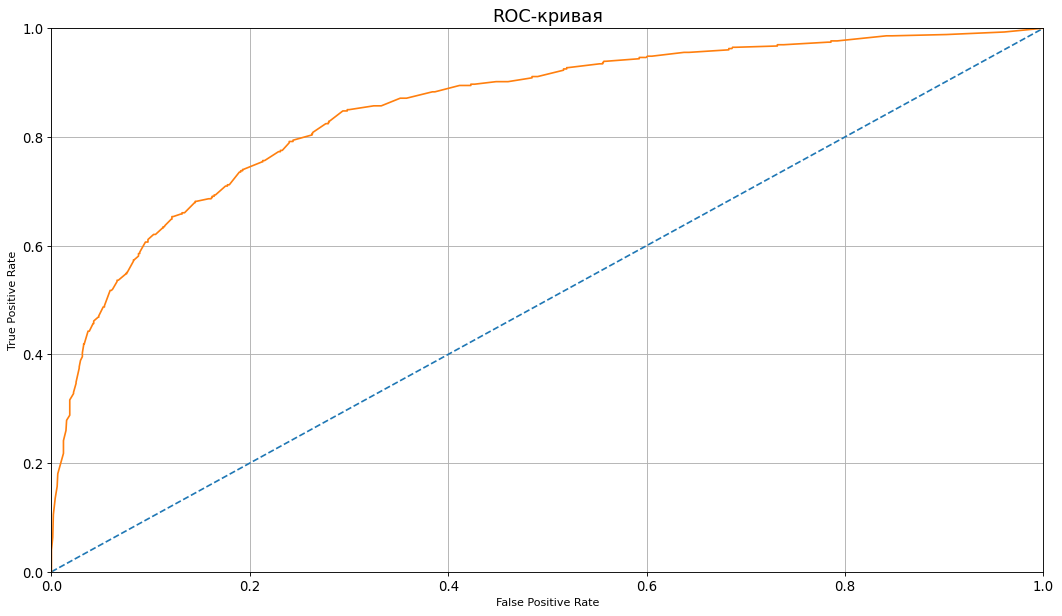

In [33]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=int(best_model_params.best_est), 
                               max_depth=int(best_model_params.best_depth))
model.fit(train_features, train_target)

probabilities_valid = model.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_valid)

fig = plt.figure(figsize=get_figsize(), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot()
ax.grid()
ax.plot([0, 1], [0, 1], linestyle='--')
ax.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plot_show('False Positive Rate', 'True Positive Rate', 'ROC-кривая')

Найдём значение метрики AUC-ROC для нашей наилучшей модели

In [34]:
print('Значение метрики AUC-ROC для найденной наилучшей модели =', roc_auc_score(test_target, probabilities_one_valid))

Значение метрики AUC-ROC для найденной наилучшей модели = 0.8527069056130159


Метрика лучше, чем у случайной модели, но до идеального (AUC-ROC = 1) не дотягивает.
Метрика AUC-ROC получилась выше чем F1, но она показывает на сколько отличается наша модель от случайной, в то время как F1 метрика даёт более адекватную оценку качеству предсказания модели.

<a id='6.10-bullet'></a> 
## Часть 4. Общий вывод. 

В данной задаче, на основании исторические данные о поведении клиентов и расторжении договоров с банком, нам необходимо было построить модель, предсказывающую уйдёт ли клиент из банка в ближайшего время. Для этого нам были предоставлены исторические данные о поведении клиентов банка.

В процессе обработки данных мы на первом этапе
* избавились от столбцов 'RowNumber', 'CustomerId', 'Surname', не дающих смысловую нагрузку для обучения моделей
* проверили оставшиеся признаки на возможную корелляцию и не обнаружили значительной корелляции между ними

На втором этапе
* перевели категориальные данные в числовые оним из методом 'OHE'
* разобили выборку на тестовую, валидационную и тренировочную
* стандартизировали данные и провели пробное построение модели без учёта дисбаланса.

В итоге у нас получилась наилучшая модель с метрикой F1 = 0.57 на валидационной выборке, которая на тестовой выборке показала F1 = 0.577, что не удовлетворительно в рамках нашей задачи.

На третьем этапе мы проделали поиск наилучшей модели по следующим пунктам:
* перевели категориальные данные в числовые одним из методов ('OHE', 'Ordinal encoding')
* разобили выборку на тестовую, валидационную и тренировочную (отдилять тестовую выборку можно только после первого пункта, по этому это пришлось делать 2 раза, но тестовая выборка от этого не изменится, так как всё время будет использоваться константный *random_state*)
* стандартизировали данные
* сбалансировали данные одним из 2 способов ('Upsampling', 'Downsampling') с различными коэффициентами (2, 4)
* обучим 3 модели с гиперпараметром *class_weight* и без него

В результате у нас получилась наилучшая модель с метрикой F1 = 0.607 на валидационной выборке, которая на тестовой выборке показала F1 = 0.621, что удовлетворительно в рамках нашей задачи.
Далее мы построили ROC-кривую и посчитали площадь под ней (метрика AUC-ROC). Результат получился 0.853, что значительно лучше чем у случайной модели и выше чем F1-мера, но до 1 сильно не дотягивает.
Получившиеся результаты поиска и обучения наилучшей модели, по моему мнению, можно считать удовлетворительными и использовать для дальнейшего предсказания поведения клиентов банка.